In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [2]:
dataset = pd.read_csv(r"C:\Users\kelvin\Downloads\archive (30)\raw_sales.csv")
dataset

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2
29578,2019-07-26 00:00:00,2601,589000,unit,2


In [3]:
dataset['datesold'] = pd.to_datetime(dataset['datesold'],infer_datetime_format=True)
indexedDataset= dataset.set_index(['datesold'])

In [4]:
df= pd.DataFrame(indexedDataset['price'],columns=['price'])

df.index.name='date'
df

,price
date,
2007-02-07,525000
2007-02-27,290000
2007-03-07,328000
2007-03-09,380000
2007-03-21,310000
...,...
2019-07-25,500000
2019-07-25,560000
2019-07-26,464950


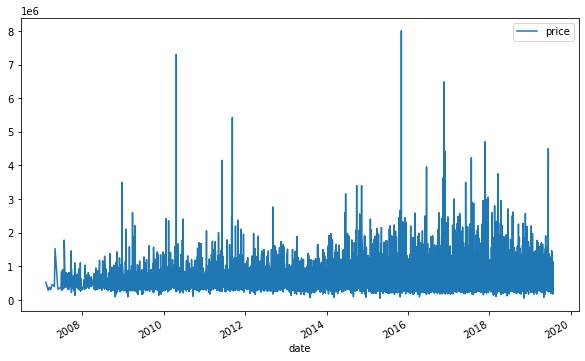

In [5]:
df.reset_index(inplace=True)
df.plot.line(x='date',y='price');

In [6]:
df['movingAverage'] = df['price'].rolling(window=5).mean()
df['movingAverage'] .head(20)
df[['price','movingAverage']]

,price,movingAverage
0,525000,NaN
1,290000,NaN
2,328000,NaN
3,380000,NaN
4,310000,366600.0
...,...,...
29575,500000,394700.0
29576,560000,447200.0
29577,464950,475990.0
29578,589000,517790.0


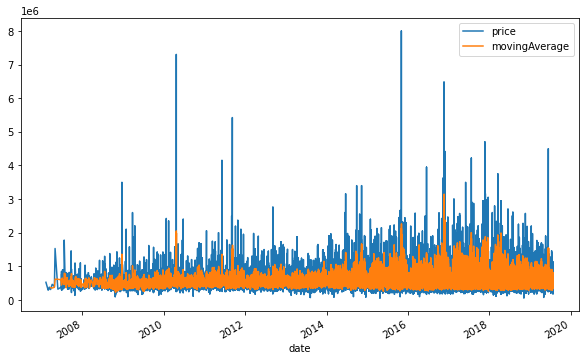

In [7]:
df.plot.line(x='date',y=['price','movingAverage']);

In [8]:
df['movingAverageCenter'] = df['price'].rolling(window=5,center=True).mean()
df['movingAverageCenter'] .head(20)
df[['price','movingAverage','movingAverageCenter']].head(20)

,price,movingAverage,movingAverageCenter
0,525000,NaN,NaN
1,290000,NaN,NaN
2,328000,NaN,366600.0
3,380000,NaN,354600.0
4,310000,366600.0,376400.0
5,465000,354600.0,616800.0
6,399000,376400.0,612600.0
7,1530000,616800.0,614600.0
8,359000,612600.0,598600.0
9,320000,614600.0,579800.0


In [9]:
import numpy as np

In [10]:
df.iloc[1:5,1] = np.NaN

In [11]:
df.head()

,date,price,movingAverage,movingAverageCenter
0,2007-02-07,525000.0,NaN,NaN
1,2007-02-27,NaN,NaN,NaN
2,2007-03-07,NaN,NaN,366600.0
3,2007-03-09,NaN,NaN,354600.0
4,2007-03-21,NaN,366600.0,376400.0


In [12]:
df['Min Periods'] = df['price'].rolling(5,min_periods=5).mean()

In [13]:
df.head(20)

,date,price,movingAverage,movingAverageCenter,Min Periods
0,2007-02-07,525000.0,NaN,NaN,NaN
1,2007-02-27,NaN,NaN,NaN,NaN
2,2007-03-07,NaN,NaN,366600.0,NaN
3,2007-03-09,NaN,NaN,354600.0,NaN
4,2007-03-21,NaN,366600.0,376400.0,NaN
5,2007-04-04,465000.0,354600.0,616800.0,NaN
6,2007-04-24,399000.0,376400.0,612600.0,NaN
7,2007-04-30,1530000.0,616800.0,614600.0,NaN
8,2007-05-24,359000.0,612600.0,598600.0,NaN
9,2007-05-25,320000.0,614600.0,579800.0,614600.0
